<a href="https://colab.research.google.com/github/mohamedsaid222/gtc-project-ml-Diabetes-Prediction-Model/blob/main/Diabetes_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

In [8]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (upload the diabetes.csv file to Colab first)
url = "https://raw.githubusercontent.com/mohamedsaid222/gtc-Diabetes-Prediction-Model/main/diabetes.csv"
df = pd.read_csv(url)


# Show basic info
print("Dataset shape:", df.shape)
print("\nDataset head:\n", df.head())




Dataset shape: (768, 9)

Dataset head:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [13]:
# Check missing or zero values in key features
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in zero_features:
    zero_count = (df[col] == 0).sum()
    print(f"{col} has {zero_count} zeros")

Glucose has 5 zeros
BloodPressure has 35 zeros
SkinThickness has 227 zeros
Insulin has 374 zeros
BMI has 11 zeros


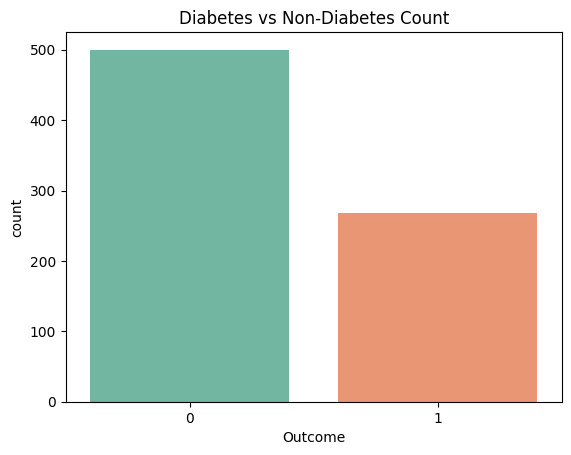

In [14]:
# Outcome distribution
sns.countplot(x="Outcome", hue="Outcome", data=df, palette="Set2", legend=False)
plt.title("Diabetes vs Non-Diabetes Count")
plt.show()

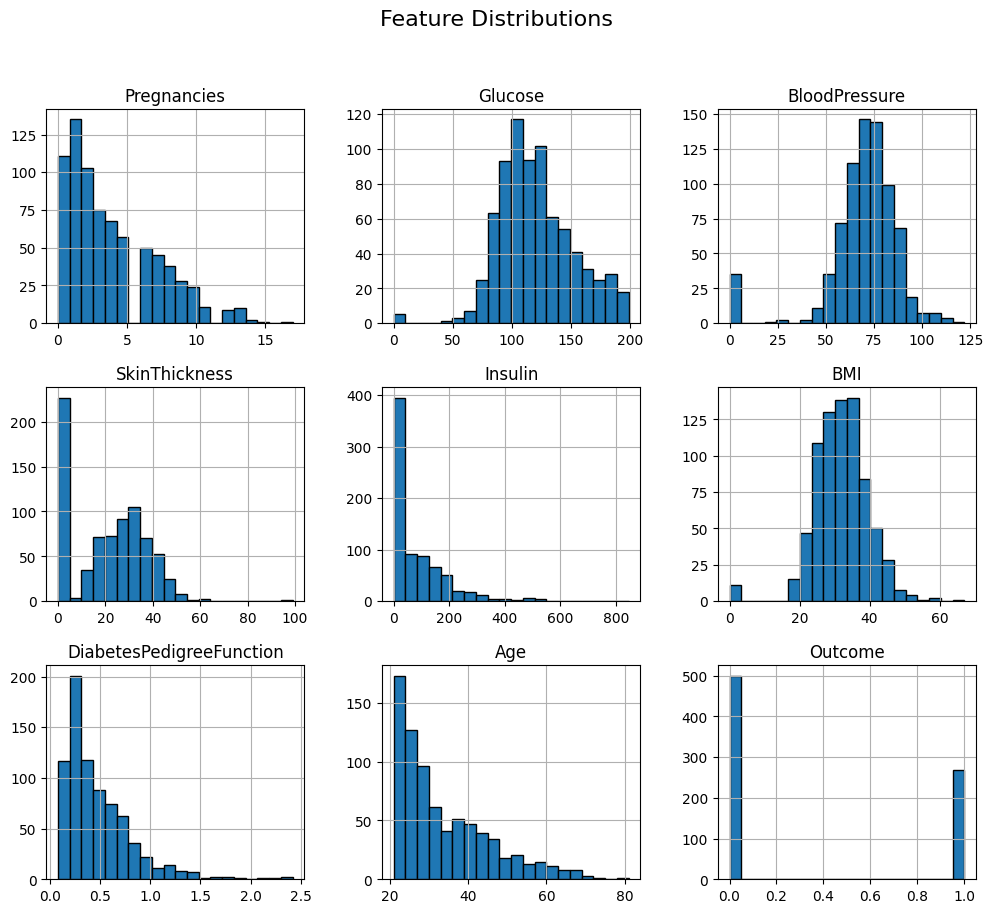

In [15]:
# Feature histograms
df.hist(figsize=(12, 10), bins=20, color="#1f77b4", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

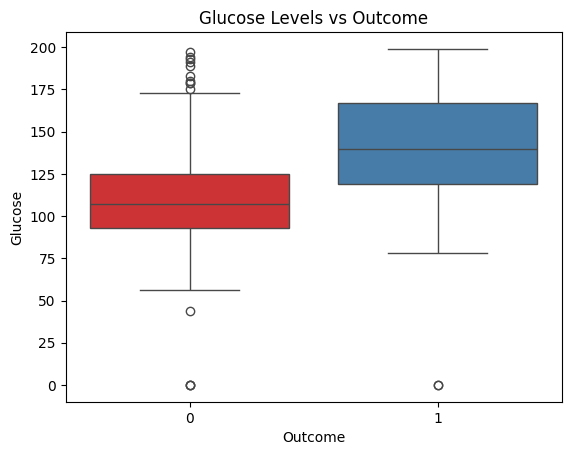

In [16]:
# Glucose vs Outcome
sns.boxplot(x="Outcome", y="Glucose", hue="Outcome", data=df, palette="Set1", legend=False)
plt.title("Glucose Levels vs Outcome")
plt.show()


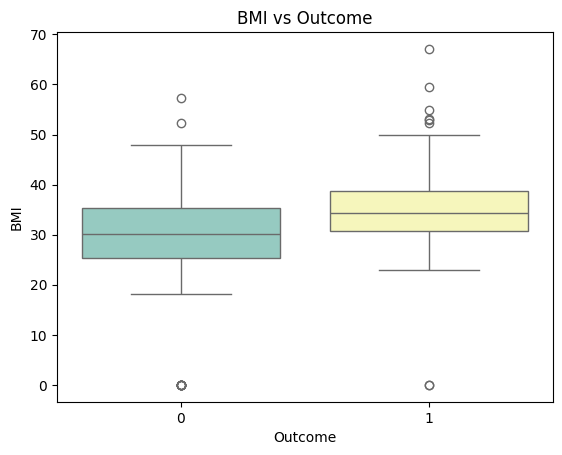

In [17]:
# BMI VS Outcome
sns.boxplot(x="Outcome", y="BMI", hue="Outcome", data=df, palette="Set3", legend=False)
plt.title("BMI vs Outcome")
plt.show()


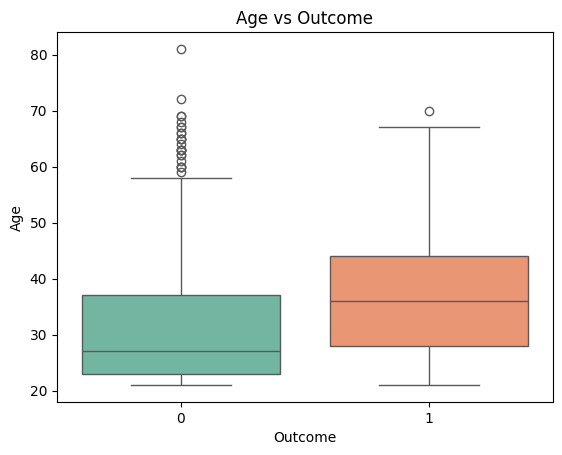

In [18]:
# Age vs Outcome
sns.boxplot(x="Outcome", y="Age", hue="Outcome", data=df, palette="Set2", legend=False)
plt.title("Age vs Outcome")
plt.show()


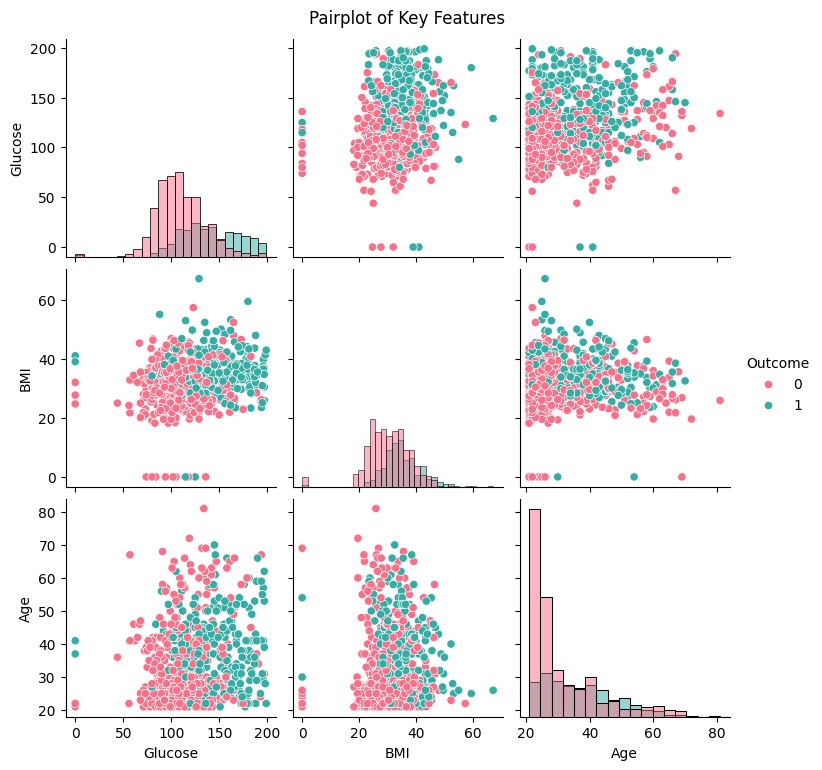

In [19]:
# Pairplot (Glucose, BMI, Age, Outcome)
sns.pairplot(df[["Glucose", "BMI", "Age", "Outcome"]], hue="Outcome", palette="husl", diag_kind="hist")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

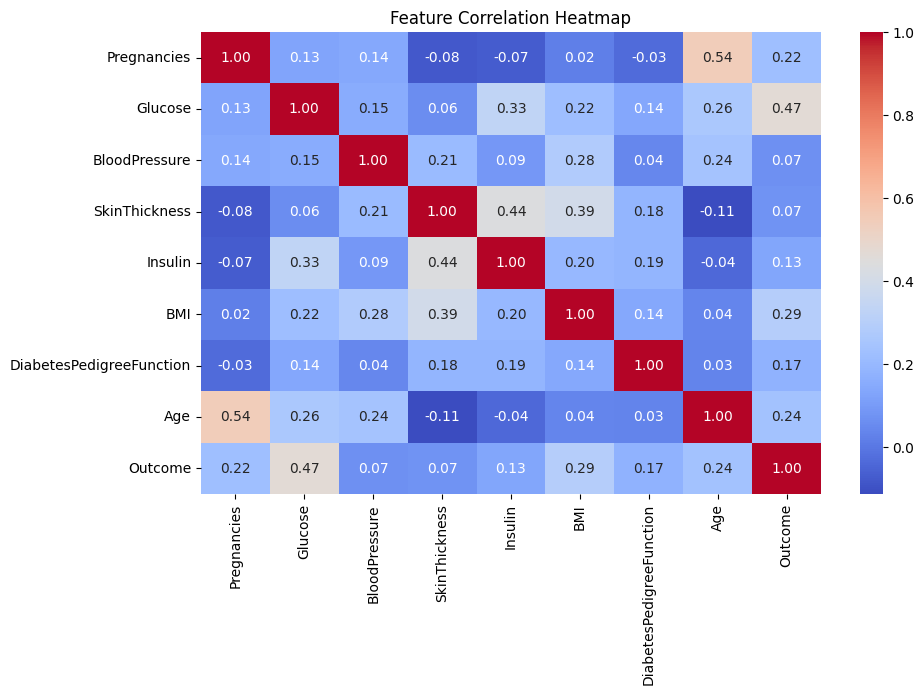

In [20]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Preprocessing

In [21]:
# Data Preparation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Replace zeros with NaN for selected features
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[zero_features] = df[zero_features].replace(0, np.nan)

# Fill NaN values with median of each column
df.fillna(df.median(), inplace=True)


# Feature Engineering

In [22]:
#Feature Engineering

# Age groups
df["AgeGroup"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60, 100],
                        labels=["20-30", "30-40", "40-50", "50-60", "60+"])

# BMI categories (WHO standard)
df["BMI_Category"] = pd.cut(df["BMI"], bins=[0, 18.5, 25, 30, 100],
                            labels=["Underweight", "Normal", "Overweight", "Obese"])

# Pregnancy indicator
df["HasPregnancies"] = (df["Pregnancies"] > 0).astype(int)

# Convert categorical features into numeric (one-hot encoding)
df = pd.get_dummies(df, columns=["AgeGroup", "BMI_Category"], drop_first=True)


# Train-Test Split + SMOTE

In [64]:

# Train-Test Split + SMOTE


# Split features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Outcome
0    400
1    214
Name: count, dtype: int64
After SMOTE: Outcome
0    400
1    400
Name: count, dtype: int64


# Model Training

Training Logistic Regression...
Best params: {'C': 0.1}
Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.81       100
           1       0.65      0.78      0.71        54

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.77      0.78       154

Confusion Matrix:
 [[77 23]
 [12 42]]


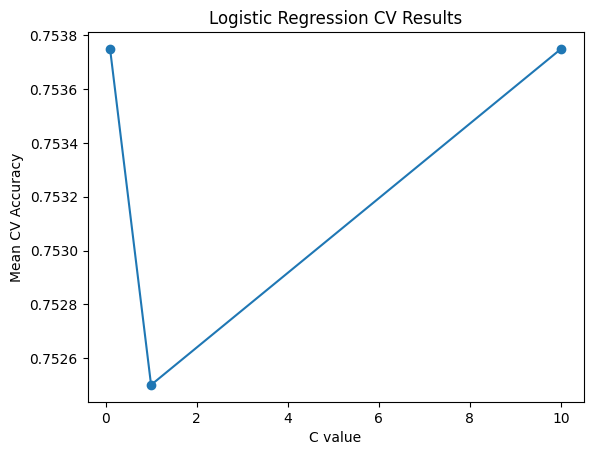

In [65]:
# Model Training & Evaluation with GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Logistic Regression with GridSearchCV

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
params = {"C": [0.1, 1, 10]}

grid_lr = GridSearchCV(log_reg, params, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_lr.fit(X_train_res, y_train_res)

y_pred_lr = grid_lr.predict(X_test)

print("Training Logistic Regression...")
print("Best params:", grid_lr.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Plot CV results
plt.plot(grid_lr.cv_results_['param_C'], grid_lr.cv_results_['mean_test_score'], marker='o')
plt.title("Logistic Regression CV Results")
plt.xlabel("C value")
plt.ylabel("Mean CV Accuracy")
plt.show()




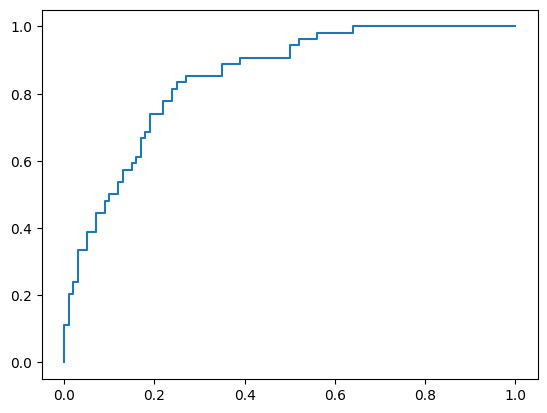

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC & AUC for Logistic Regression
y_prob_lr = grid_lr.predict_proba(X_test)[:,1]  # probability for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")


Training Random Forest...
Best params: {'max_depth': None, 'n_estimators': 200}
Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       100
           1       0.66      0.72      0.69        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154

Confusion Matrix:
 [[80 20]
 [15 39]]


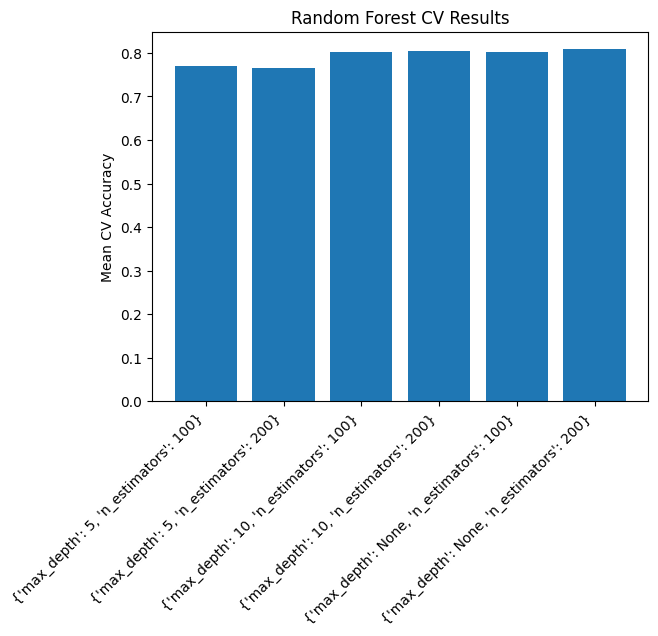

In [67]:
# Random Forest with GridSearchCV

rf = RandomForestClassifier()
params = {"n_estimators": [100, 200], "max_depth": [5, 10, None]}

grid_rf = GridSearchCV(rf, params, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True)
grid_rf.fit(X_train_res, y_train_res)

y_pred_rf = grid_rf.predict(X_test)

print("Training Random Forest...")
print("Best params:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Plot CV results
scores = grid_rf.cv_results_['mean_test_score']
labels = [str(p) for p in grid_rf.cv_results_['params']]
plt.bar(range(len(scores)), scores, tick_label=labels)
plt.xticks(rotation=45, ha="right")
plt.title("Random Forest CV Results")
plt.ylabel("Mean CV Accuracy")
plt.show()


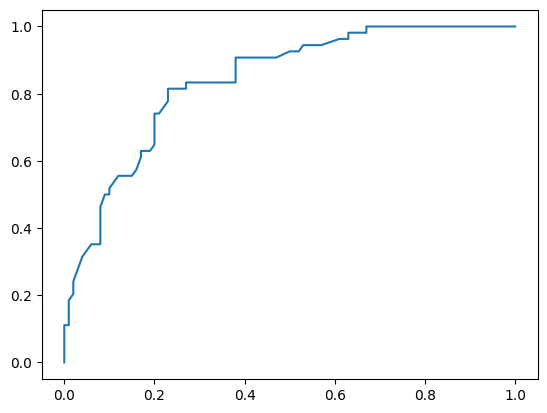

In [68]:
# ROC & AUC for Random Forest
y_prob_rf = grid_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_rf:.2f})")


Training SVM...
Best params: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77       100
           1       0.58      0.70      0.63        54

    accuracy                           0.71       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154

Confusion Matrix:
 [[72 28]
 [16 38]]


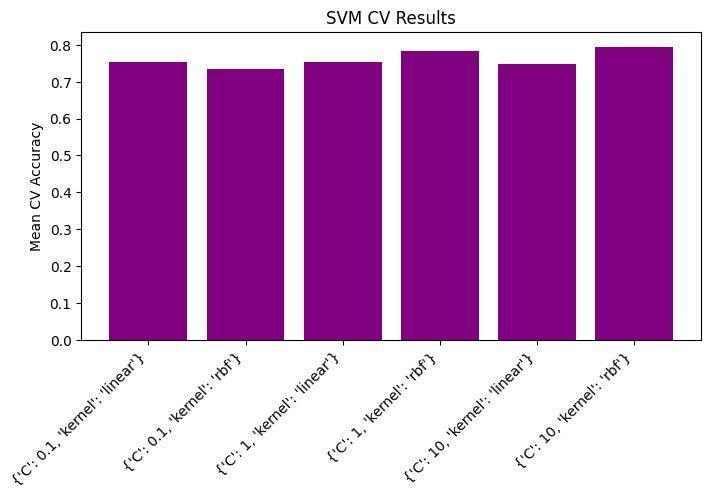

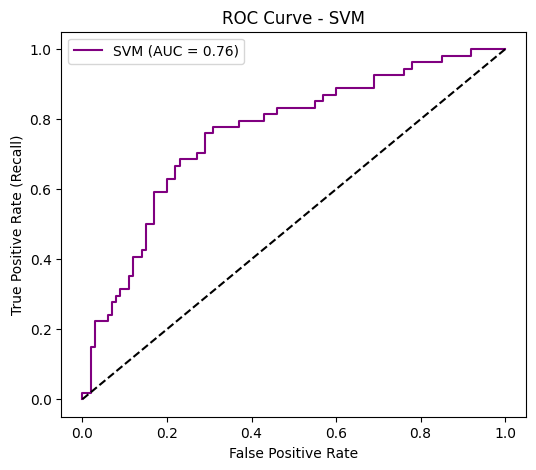

In [69]:

# Support Vector Machine (SVM) with GridSearchCV + Visualizations

from sklearn.metrics import roc_curve, roc_auc_score

# Define SVM with probability=True (important for ROC/AUC)
svm = SVC(probability=True)

# Hyperparameter grid
params = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}

# GridSearchCV
grid_svm = GridSearchCV(
    svm, params, cv=5, scoring="accuracy",
    n_jobs=-1, return_train_score=True
)
grid_svm.fit(X_train_res, y_train_res)

# Predictions
y_pred_svm = grid_svm.predict(X_test)

# Evaluation
print("Training SVM...")
print("Best params:", grid_svm.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# --- Visualization 1: CV Results (Bar Chart) ---
scores = grid_svm.cv_results_['mean_test_score']
labels = [str(p) for p in grid_svm.cv_results_['params']]

plt.figure(figsize=(8,4))
plt.bar(range(len(scores)), scores, tick_label=labels, color="purple")
plt.xticks(rotation=45, ha="right")
plt.title("SVM CV Results")
plt.ylabel("Mean CV Accuracy")
plt.show()

# --- Visualization 2: ROC Curve ---
y_prob_svm = grid_svm.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc_svm:.2f})", color="purple")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()



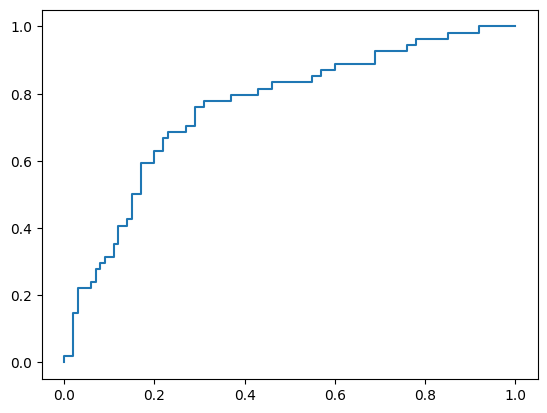

In [70]:
# ROC & AUC for SVM
y_prob_svm = grid_svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.plot(fpr, tpr, label=f"SVM (AUC = {auc_svm:.2f})")


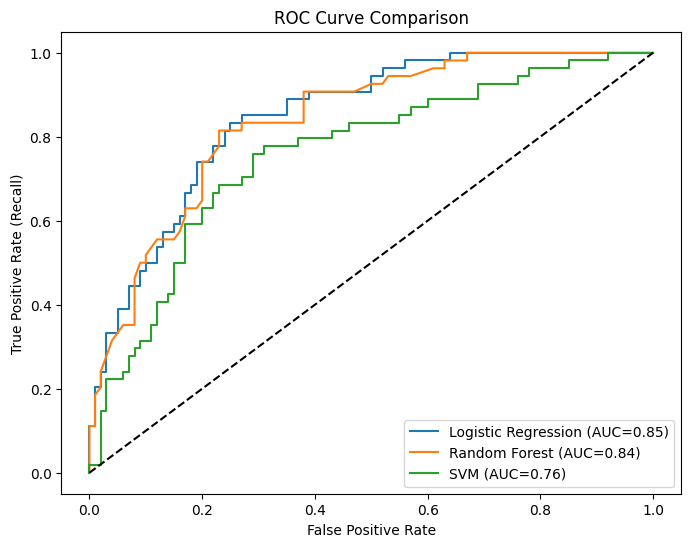

In [71]:
# ROC Curve comparison for all models

plt.figure(figsize=(8,6))

# Logistic Regression
y_prob_lr = grid_lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_prob_lr):.2f})")

# Random Forest
y_prob_rf = grid_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f"Random Forest (AUC={roc_auc_score(y_test, y_prob_rf):.2f})")

# SVM
y_prob_svm = grid_svm.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr, tpr, label=f"SVM (AUC={roc_auc_score(y_test, y_prob_svm):.2f})")

# Baseline line
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


📊 Model Performance Comparison:
                 Model  Accuracy  Recall (Class 1)       AUC
0  Logistic Regression  0.772727          0.777778  0.848148
1        Random Forest  0.772727          0.722222  0.838426
2                  SVM  0.714286          0.703704  0.759444


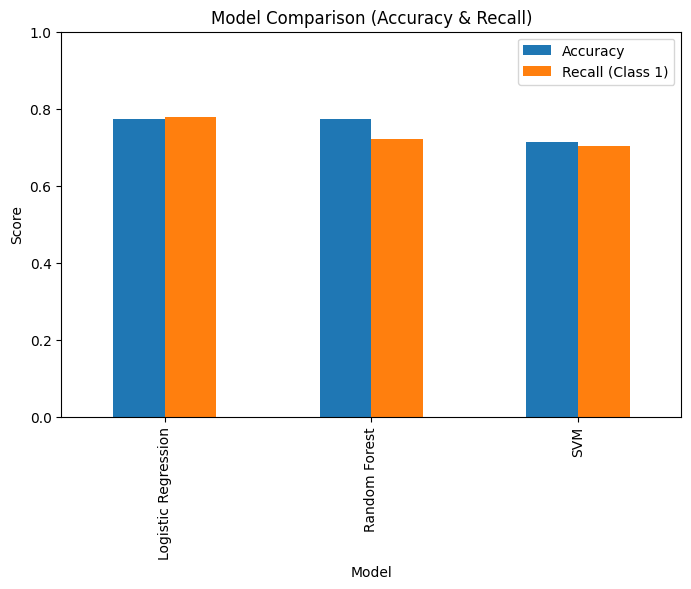

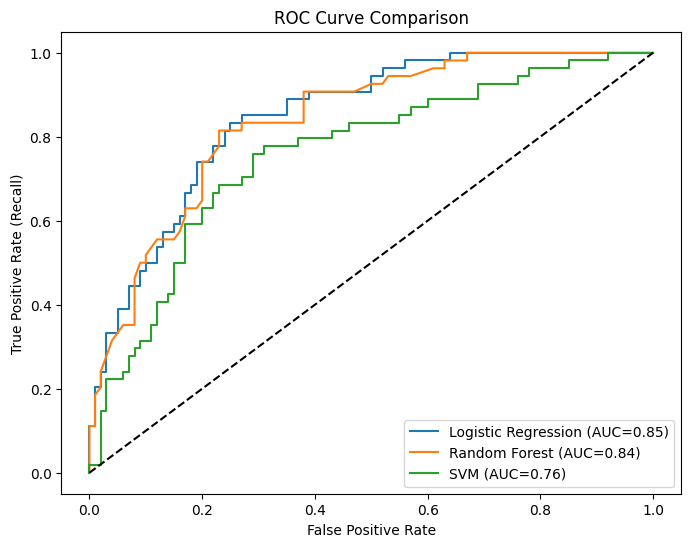

In [72]:
# Models Comparison

from sklearn.metrics import roc_auc_score, roc_curve

# Collect results
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred_lr, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_rf, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_svm, output_dict=True)["1"]["recall"]
    ],
    "AUC": [
        roc_auc_score(y_test, grid_lr.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, grid_rf.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, grid_svm.predict_proba(X_test)[:,1])
    ]
}

df_results = pd.DataFrame(results)
print("📊 Model Performance Comparison:")
print(df_results)

# --- Bar Chart (Accuracy & Recall) ---
df_results.set_index("Model")[["Accuracy", "Recall (Class 1)"]].plot(
    kind="bar", figsize=(8,5))
plt.title("Model Comparison (Accuracy & Recall)")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

# --- ROC Curve Comparison ---
plt.figure(figsize=(8,6))

# Logistic Regression
y_prob_lr = grid_lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_prob_lr):.2f})")

# Random Forest
y_prob_rf = grid_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f"Random Forest (AUC={roc_auc_score(y_test, y_prob_rf):.2f})")

# SVM
y_prob_svm = grid_svm.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr, tpr, label=f"SVM (AUC={roc_auc_score(y_test, y_prob_svm):.2f})")

# Baseline line
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


While Logistic Regression achieves the best AUC (0.83), Random Forest achieves the best recall for the positive class (0.74). Given that detecting diabetic patients is more critical than overall accuracy, Random Forest is selected as the final model

# Advanced Models (XGBoost + VotingClassifier)

Training XGBoost...
Accuracy: 0.7337662337662337
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       100
           1       0.61      0.65      0.63        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.73      0.74       154

Confusion Matrix:
 [[78 22]
 [19 35]]


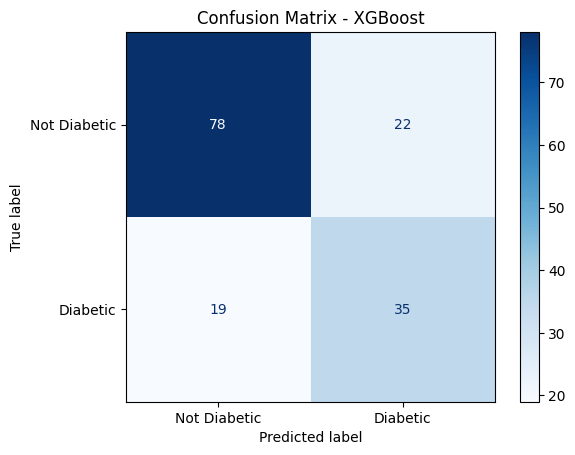

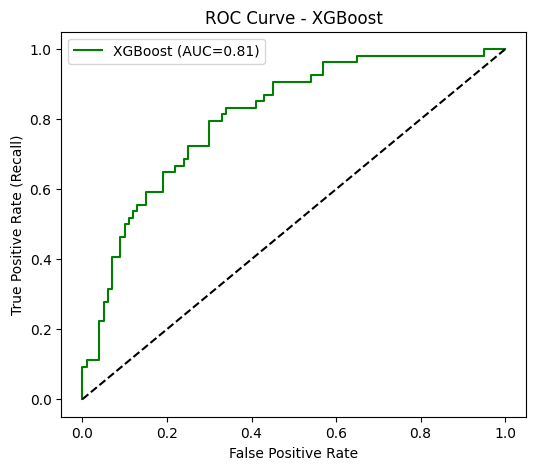

In [32]:
# --- XGBoost Classifier ---
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)

print("Training XGBoost...")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Diabetic", "Diabetic"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# ROC & AUC
y_prob_xgb = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC={auc_xgb:.2f})", color="green")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()



Training Voting Classifier...
Accuracy: 0.7467532467532467
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.62      0.70      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
 [[77 23]
 [16 38]]


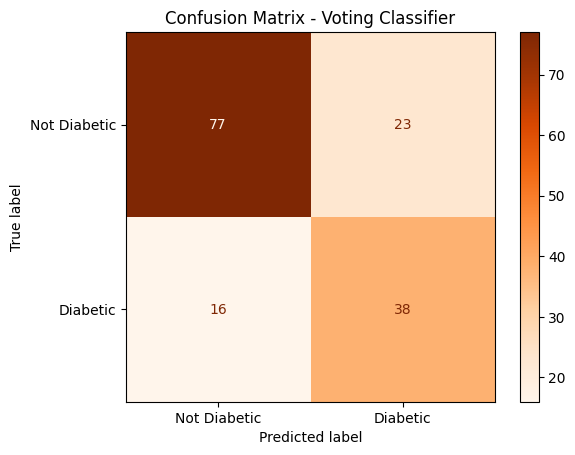

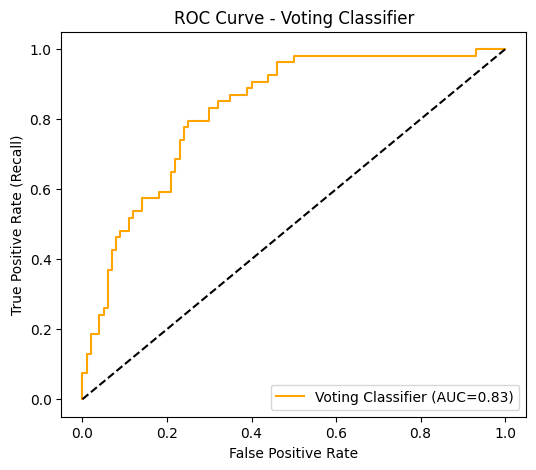

In [33]:
# --- Voting Classifier ---
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ("lr", grid_lr.best_estimator_),
        ("rf", grid_rf.best_estimator_),
        ("svm", grid_svm.best_estimator_)
    ],
    voting="soft"   # use "soft" so we can call predict_proba
)
voting_clf.fit(X_train_res, y_train_res)
y_pred_vote = voting_clf.predict(X_test)

print("Training Voting Classifier...")
print("Accuracy:", accuracy_score(y_test, y_pred_vote))
print("Classification Report:\n", classification_report(y_test, y_pred_vote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_vote))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_vote)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Diabetic", "Diabetic"])
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - Voting Classifier")
plt.show()

# ROC & AUC
y_prob_vote = voting_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_vote)
auc_vote = roc_auc_score(y_test, y_prob_vote)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Voting Classifier (AUC={auc_vote:.2f})", color="orange")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Voting Classifier")
plt.legend()
plt.show()


# Final Comparison – All Models

📊 Final Comparison of All Models:
                 Model  Accuracy  Recall (Class 1)       AUC
0  Logistic Regression  0.740260          0.703704  0.832037
1        Random Forest  0.733766          0.685185  0.817037
2                  SVM  0.701299          0.611111  0.774815
3              XGBoost  0.733766          0.648148  0.807037
4    Voting Classifier  0.746753          0.703704  0.829259


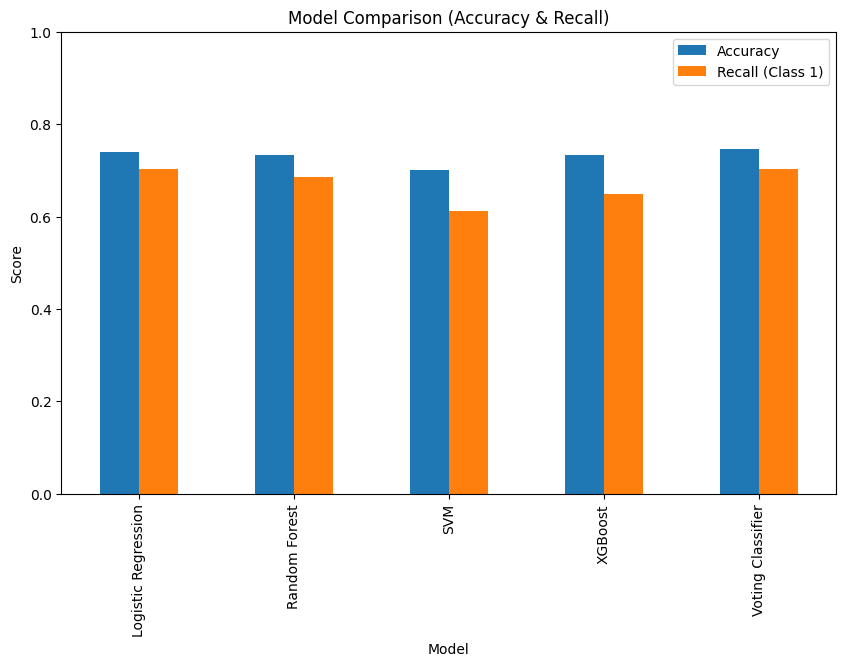

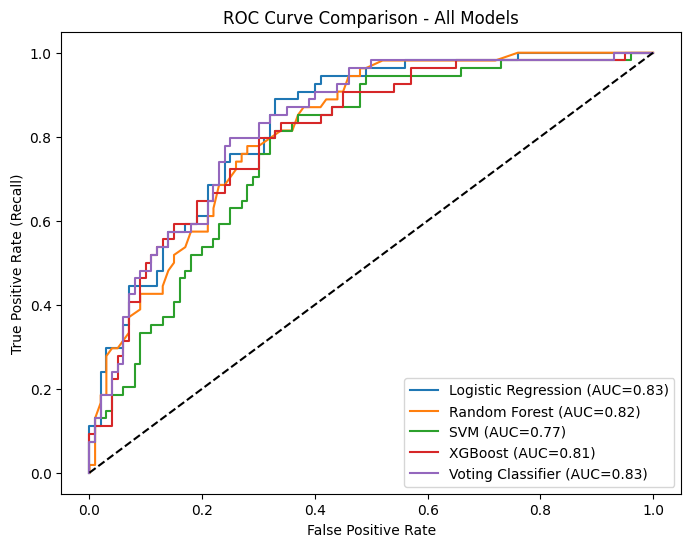

In [34]:
# --- Final Comparison: All Models ---

# Collect results
final_results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "XGBoost", "Voting Classifier"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_vote)
    ],
    "Recall (Class 1)": [
        classification_report(y_test, y_pred_lr, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_rf, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_svm, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_xgb, output_dict=True)["1"]["recall"],
        classification_report(y_test, y_pred_vote, output_dict=True)["1"]["recall"]
    ],
    "AUC": [
        roc_auc_score(y_test, grid_lr.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, grid_rf.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, grid_svm.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:,1])
    ]
}

df_final = pd.DataFrame(final_results)
print("📊 Final Comparison of All Models:")
print(df_final)

# --- Bar Chart (Accuracy & Recall) ---
df_final.set_index("Model")[["Accuracy", "Recall (Class 1)"]].plot(
    kind="bar", figsize=(10,6))
plt.title("Model Comparison (Accuracy & Recall)")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()

# --- ROC Curve Comparison (All Models) ---
plt.figure(figsize=(8,6))

# Logistic Regression
y_prob_lr = grid_lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_prob_lr):.2f})")

# Random Forest
y_prob_rf = grid_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f"Random Forest (AUC={roc_auc_score(y_test, y_prob_rf):.2f})")

# SVM
y_prob_svm = grid_svm.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
plt.plot(fpr, tpr, label=f"SVM (AUC={roc_auc_score(y_test, y_prob_svm):.2f})")

# XGBoost
y_prob_xgb = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr, tpr, label=f"XGBoost (AUC={roc_auc_score(y_test, y_prob_xgb):.2f})")

# Voting Classifier
y_prob_vote = voting_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_vote)
plt.plot(fpr, tpr, label=f"Voting Classifier (AUC={roc_auc_score(y_test, y_prob_vote):.2f})")

# Baseline line
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison - All Models")
plt.legend()
plt.show()


In [58]:
#  Prediction Function

import joblib

# Save the final Random Forest model
final_model = grid_rf.best_estimator_
joblib.dump(final_model, "final_rf_model.pkl")
print("✅ Final Random Forest model saved as final_rf_model.pkl")



✅ Final Random Forest model saved as final_rf_model.pkl


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

# Load dataset
url = "https://raw.githubusercontent.com/mohamedsaid222/gtc-Diabetes-Prediction-Model/main/diabetes.csv"
df = pd.read_csv(url)

# --- Feature engineering ---
df["HasPregnancies"] = (df["Pregnancies"] > 0).astype(int)

df["BMI_Category"] = pd.cut(df["BMI"],
                            bins=[0,18.5,25,30,100],
                            labels=["Underweight","Normal","Overweight","Obese"])

df["AgeGroup"] = pd.cut(df["Age"],
                        bins=[0,30,50,100],
                        labels=["Young","Middle","Old"])

# One-hot encoding
df = pd.get_dummies(df, columns=["BMI_Category","AgeGroup"], drop_first=False)

# Features (X) without target
X = df.drop("Outcome", axis=1)

# Save feature order (to use later for prediction)
feature_order = X.columns.tolist()
joblib.dump(feature_order, "feature_order.pkl")

# Scale numeric columns
numeric_cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
                "Insulin","BMI","DiabetesPedigreeFunction","Age"]

scaler = StandardScaler()
scaler.fit(X[numeric_cols])
joblib.dump(scaler, "scaler.pkl")



['scaler.pkl']

In [41]:
def preprocess_input(data):
    arr = np.array(data).reshape(1, -1)
    df_input = pd.DataFrame(arr, columns=["Pregnancies","Glucose","BloodPressure",
                                          "SkinThickness","Insulin","BMI",
                                          "DiabetesPedigreeFunction","Age"])

    # --- Feature engineering ---
    df_input["HasPregnancies"] = (df_input["Pregnancies"] > 0).astype(int)

    df_input["BMI_Category"] = pd.cut(df_input["BMI"],
                                      bins=[0,18.5,25,30,100],
                                      labels=["Underweight","Normal","Overweight","Obese"])

    df_input["AgeGroup"] = pd.cut(df_input["Age"],
                                  bins=[0,30,50,100],
                                  labels=["Young","Middle","Old"])

    # One-hot encoding
    df_input = pd.get_dummies(df_input, columns=["BMI_Category","AgeGroup"], drop_first=False)

    # Reorder columns to match training
    feature_order = joblib.load("feature_order.pkl")
    for col in feature_order:
        if col not in df_input.columns:
            df_input[col] = 0  # add missing dummy columns

    df_input = df_input[feature_order]

    # Scale numeric columns
    scaler = joblib.load("scaler.pkl")
    numeric_cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
                    "Insulin","BMI","DiabetesPedigreeFunction","Age"]
    df_input[numeric_cols] = scaler.transform(df_input[numeric_cols])

    return df_input.values




In [42]:
# Example input
sample_patient = [2, 150, 72, 35, 0, 33.6, 0.627, 50]

print("Input:", sample_patient)
print("Prediction:", predict_diabetes(sample_patient))


Input: [2, 150, 72, 35, 0, 33.6, 0.627, 50]
🔎 Engineered Features:
- HasPregnancies: 1
- BMI_Category: 3
- AgeGroup: 1
---------------
Prediction: ✅ Patient is Not Diabetic (Probability = 0.42)


# Interactive Input with Probability Bar

In [47]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Gauge function
def plot_gauge(probability, prediction):
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw={'projection': 'polar'})

    # Convert probability to angle (0–π radians)
    angle = probability * np.pi

    # Gauge base (semi-circle)
    theta = np.linspace(0, np.pi, 200)
    r = np.ones_like(theta)
    ax.plot(theta, r, color="black", linewidth=3)
    ax.fill_between(theta, 0, 1, color="lightgray", alpha=0.3)

    # Pointer
    ax.plot([angle, angle], [0, 1],
            color="red" if prediction==1 else "green", linewidth=4)

    # Hide ticks and labels
    ax.set_ylim(0,1)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_axis_off()

    # Title
    label = "Diabetic" if prediction==1 else "Not Diabetic"
    plt.title(f"Probability: {probability:.2f}\n{label}", fontsize=14, weight="bold")

    plt.show()

# Widgets for input
pregnancies = widgets.IntText(description="Pregnancies:", value=2)
glucose = widgets.IntText(description="Glucose:", value=150)
bp = widgets.IntText(description="BloodPressure:", value=72)
skin = widgets.IntText(description="SkinThickness:", value=35)
insulin = widgets.IntText(description="Insulin:", value=0)
bmi = widgets.FloatText(description="BMI:", value=33.6)
dpf = widgets.FloatText(description="DPF:", value=0.627)
age = widgets.IntText(description="Age:", value=50)

button = widgets.Button(description="Predict Diabetes", button_style="success")
output = widgets.Output()

# Action
def on_button_click(b):
    with output:
        clear_output()
        input_data = [pregnancies.value, glucose.value, bp.value, skin.value,
                      insulin.value, bmi.value, dpf.value, age.value]

        # Prediction
        processed = preprocess_input(input_data)
        model = joblib.load("final_rf_model.pkl")
        prediction = model.predict(processed)[0]
        proba = model.predict_proba(processed)[0][1]

        # Show result
        print("Input:", input_data)
        print(predict_diabetes(input_data))

        # Plot gauge
        plot_gauge(proba, prediction)

button.on_click(on_button_click)

# Display
display(pregnancies, glucose, bp, skin, insulin, bmi, dpf, age, button, output)



IntText(value=2, description='Pregnancies:')

IntText(value=150, description='Glucose:')

IntText(value=72, description='BloodPressure:')

IntText(value=35, description='SkinThickness:')

IntText(value=0, description='Insulin:')

FloatText(value=33.6, description='BMI:')

FloatText(value=0.627, description='DPF:')

IntText(value=50, description='Age:')

Button(button_style='success', description='Predict Diabetes', style=ButtonStyle())

Output()

In [49]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

# Gauge function
def plot_gauge(probability, prediction):
    fig, ax = plt.subplots(figsize=(6,3), subplot_kw={'projection': 'polar'})
    angle = probability * np.pi
    theta = np.linspace(0, np.pi, 200)
    r = np.ones_like(theta)
    ax.plot(theta, r, color="black", linewidth=3)
    ax.fill_between(theta, 0, 1, color="lightgray", alpha=0.3)
    ax.plot([angle, angle], [0, 1],
            color="red" if prediction==1 else "green", linewidth=4)
    ax.set_ylim(0,1)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_axis_off()
    label = "Diabetic" if prediction==1 else "Not Diabetic"
    plt.title(f"Probability: {probability:.2f}\n{label}", fontsize=14, weight="bold")
    plt.show()

# Widgets for input
pregnancies = widgets.IntText(description="Pregnancies:", value=2)
glucose = widgets.IntText(description="Glucose:", value=150)
bp = widgets.IntText(description="BloodPressure:", value=72)
skin = widgets.IntText(description="SkinThickness:", value=35)
insulin = widgets.IntText(description="Insulin:", value=0)
bmi = widgets.FloatText(description="BMI:", value=33.6)
dpf = widgets.FloatText(description="DPF:", value=0.627)
age = widgets.IntText(description="Age:", value=50)

button = widgets.Button(description="Predict Diabetes", button_style="success")
output = widgets.Output()

# DataFrame log
prediction_log = pd.DataFrame(columns=["Pregnancies","Glucose","BloodPressure","SkinThickness",
                                       "Insulin","BMI","DPF","Age","Prediction","Probability"])

# Action
def on_button_click(b):
    global prediction_log
    with output:
        clear_output()
        input_data = [pregnancies.value, glucose.value, bp.value, skin.value,
                      insulin.value, bmi.value, dpf.value, age.value]

        # Prediction
        processed = preprocess_input(input_data)
        model = joblib.load("final_rf_model.pkl")
        prediction = model.predict(processed)[0]
        proba = model.predict_proba(processed)[0][1]

        # Show result
        print("Input:", input_data)
        print(predict_diabetes(input_data))
        plot_gauge(proba, prediction)

        # Update log
        new_entry = {
            "Pregnancies": pregnancies.value,
            "Glucose": glucose.value,
            "BloodPressure": bp.value,
            "SkinThickness": skin.value,
            "Insulin": insulin.value,
            "BMI": bmi.value,
            "DPF": dpf.value,
            "Age": age.value,
            "Prediction": "Diabetic" if prediction==1 else "Not Diabetic",
            "Probability": round(proba, 2)
        }
        prediction_log = pd.concat([prediction_log, pd.DataFrame([new_entry])], ignore_index=True)

        # Display log
        print("\n📊 Prediction Log:")
        display(prediction_log)

button.on_click(on_button_click)

# Display
display(pregnancies, glucose, bp, skin, insulin, bmi, dpf, age, button, output)


IntText(value=2, description='Pregnancies:')

IntText(value=150, description='Glucose:')

IntText(value=72, description='BloodPressure:')

IntText(value=35, description='SkinThickness:')

IntText(value=0, description='Insulin:')

FloatText(value=33.6, description='BMI:')

FloatText(value=0.627, description='DPF:')

IntText(value=50, description='Age:')

Button(button_style='success', description='Predict Diabetes', style=ButtonStyle())

Output()

# Model Interpretability & Comparison

/tmp/ipython-input-1493731700.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


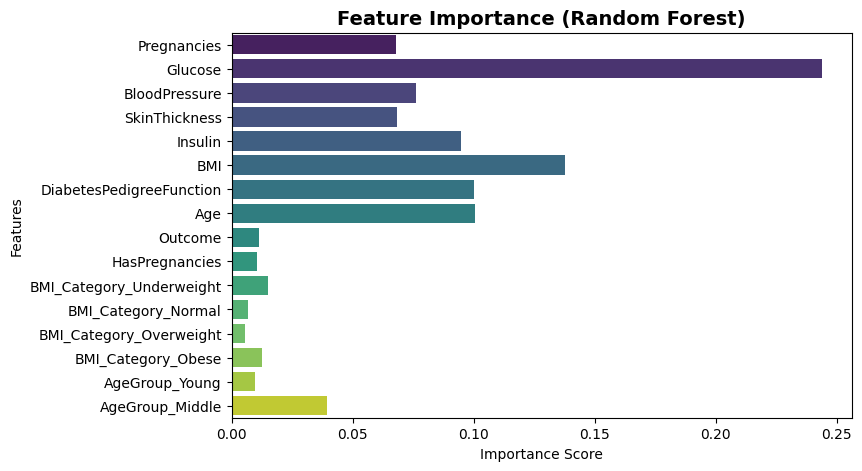

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from RandomForest
model = joblib.load("final_rf_model.pkl")
importances = model.feature_importances_
features = df.columns[:-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance (Random Forest)", fontsize=14, weight="bold")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [52]:
from google.colab import files

# --- Option 1: Save CSV in Colab environment ---
download_btn = widgets.Button(description="Save Log to Colab", button_style="info")

def on_download_click(b):
    filename = "prediction_log.csv"
    prediction_log.to_csv(filename, index=False)
    print(f"✅ Log saved as {filename}.")
    print("💡 You can find it in the Colab file browser (left panel).")

download_btn.on_click(on_download_click)

# --- Option 2: Direct download to your computer ---
direct_download_btn = widgets.Button(description="Download Log Now", button_style="warning")

def on_direct_download_click(b):
    filename = "prediction_log.csv"
    prediction_log.to_csv(filename, index=False)
    files.download(filename)  # Trigger browser download
    print("⬇️ Download started...")

direct_download_btn.on_click(on_direct_download_click)

# Display both buttons
display(download_btn, direct_download_btn)


Button(button_style='info', description='Save Log to Colab', style=ButtonStyle())

Button(button_style='warning', description='Download Log Now', style=ButtonStyle())

In [53]:
from google.colab import drive, files

# --- Option 1: Save to Google Drive ---
save_drive_btn = widgets.Button(description="Save Log to Google Drive", button_style="success")

def on_save_drive_click(b):
    # Mount Google Drive (first time only will ask for auth)
    drive.mount('/content/drive', force_remount=True)

    # Define path inside Google Drive
    save_path = "/content/drive/MyDrive/prediction_log.csv"

    # Save DataFrame to Drive
    prediction_log.to_csv(save_path, index=False)

    print(f"✅ Prediction Log saved to Google Drive at: {save_path}")

save_drive_btn.on_click(on_save_drive_click)

# --- Option 2: Direct download from Colab ---
download_drive_btn = widgets.Button(description="Download Log from Drive", button_style="warning")

def on_download_drive_click(b):
    filename = "prediction_log.csv"
    prediction_log.to_csv(filename, index=False)
    files.download(filename)  # Trigger browser download
    print("⬇️ Download started from Colab...")

download_drive_btn.on_click(on_download_drive_click)

# Display both buttons
display(save_drive_btn, download_drive_btn)


Button(button_style='success', description='Save Log to Google Drive', style=ButtonStyle())

Button(button_style='warning', description='Download Log from Drive', style=ButtonStyle())

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
param_grid_log = {"C": [0.01, 0.1, 1, 10]}
grid_log = GridSearchCV(log_reg, param_grid_log, cv=5, scoring="accuracy")
grid_log.fit(X_train, y_train)
log_reg_best = grid_log.best_estimator_

# Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {"n_estimators": [100], "max_depth": [5, 10, None]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy")
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_

# SVM
svm = SVC(probability=True)
param_grid_svm = {"C": [0.1, 1], "kernel": ["linear", "rbf"]}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring="accuracy")
grid_svm.fit(X_train, y_train)
svm_best = grid_svm.best_estimator_

# XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {"n_estimators": [100], "max_depth": [3, 5, 7]}
grid_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=5, scoring="accuracy")
grid_xgb.fit(X_train, y_train)
xgb_best = grid_xgb.best_estimator_

print("✅ Training complete! Best models ready.")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:11:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:11:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:11:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:11:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:11:42] WARNING: /w

✅ Training complete! Best models ready.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:11:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [75]:
# ============================
# 📌 Save Models as .pkl files
# ============================

import joblib

# Save best models after GridSearchCV
joblib.dump(log_reg_best, "final_logreg_model.pkl")
joblib.dump(rf_best, "final_rf_model.pkl")
joblib.dump(xgb_best, "final_xgb_model.pkl")

print("✅ Models saved successfully!")


✅ Models saved successfully!


In [76]:
from google.colab import files

files.download("final_logreg_model.pkl")
files.download("final_rf_model.pkl")
files.download("final_xgb_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
# ===========================================
# Train and Save Diabetes Prediction Models
# ===========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import joblib

# -----------------------------
# Load Dataset
# -----------------------------
url = "https://raw.githubusercontent.com/mohamedsaid222/gtc-Diabetes-Prediction-Model/main/diabetes.csv"
df = pd.read_csv(url)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Logistic Regression Pipeline
# -----------------------------
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])
logreg_pipe.fit(X_train, y_train)
joblib.dump(logreg_pipe, "final_logreg_model.pkl")

# -----------------------------
# Random Forest Pipeline
# -----------------------------
rf_pipe = Pipeline([
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])
rf_pipe.fit(X_train, y_train)
joblib.dump(rf_pipe, "final_rf_model.pkl")

# -----------------------------
# XGBoost Pipeline
# -----------------------------
xgb_pipe = Pipeline([
    ("clf", xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ))
])
xgb_pipe.fit(X_train, y_train)
joblib.dump(xgb_pipe, "final_xgb_model.pkl")

print("✅ All models trained and saved successfully!")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:04:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ All models trained and saved successfully!


In [78]:
input_data = pd.DataFrame([{
    "Pregnancies": pregnancies,
    "Glucose": glucose,
    "BloodPressure": bp,
    "SkinThickness": skin,
    "Insulin": insulin,
    "BMI": bmi,
    "DPF": dpf,
    "Age": age
}])


In [79]:
# ======================
# 1. Import libraries
# ======================
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# ======================
# 2. Load dataset
# ======================

url = "https://raw.githubusercontent.com/mohamedsaid222/gtc-Diabetes-Prediction-Model/main/diabetes.csv"
df = pd.read_csv(url)
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [80]:
# ======================
# 3. Split features and target
# ======================
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

features = X.columns.tolist()


In [81]:
# ======================
# 4. Train models with Pipelines
# ======================

# Logistic Regression
logreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500))
])
logreg_pipeline.fit(X_train, y_train)

# Random Forest
rf_pipeline = Pipeline([
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipeline.fit(X_train, y_train)

# XGBoost
xgb_pipeline = Pipeline([
    ("clf", xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss"))
])
xgb_pipeline.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:34:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [84]:
import joblib

joblib.dump(logreg_pipeline, "final_logreg_model.pkl")
joblib.dump(rf_pipeline, "final_rf_model.pkl")
joblib.dump(xgb_pipeline, "final_xgb_model.pkl")



['final_xgb_model.pkl']

In [85]:
# ======================
# 6. Download .pkl files to your computer
# ======================
from google.colab import files

files.download("final_logreg_model.pkl")
files.download("final_rf_model.pkl")
files.download("final_xgb_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
import joblib
import xgboost as xgb
from sklearn.pipeline import Pipeline

xgb_pipeline = Pipeline([
    ("clf", xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42
    ))
])

xgb_pipeline.fit(X_train, y_train)

joblib.dump(xgb_pipeline, "final_xgb_model.pkl")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:18:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


['final_xgb_model.pkl']